# Assignment 2 - ETF price prediction

This assignment is about predicting linearm model by using different ways
1. Using Sklearn(LinearRegression)
2. Using StatsModels
3. Using Least square function and Scipy Optimization

By Sasi Nakchatree

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm
from scipy.optimize import least_squares

Import AmericanAirline stock price data in text file and convert to dataframe 

In [243]:
df = pd.read_csv(r"C:\Users\White\OneDrive\Desktop\qqq.txt")
data = pd.DataFrame(df, columns=['Date','Open','High','Low','Close','Volume'])



Calculate daily average prices

In [244]:
data['Avg'] = (data['High']+data['Low'])/2

Use Sklearn(LinearRegression) to predict QQQ price

In [245]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [246]:
main = data[['Close']]
sample = int(10)
main['Prediction'] = main[['Close']].shift(-sample)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
X = np.array(main.drop(['Prediction'],1))
X = preprocessing.scale(X)

In [248]:
Xpredict = X[-sample:]
X = X[:-sample]

Y = np.array(main['Prediction'])
Y = Y[:-sample]

In [249]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [250]:
model1 = lr()
model1.fit(X_train,Y_train)

confidence = model1.score(X_test,Y_test)
print(confidence)

0.9927590580662506


In [251]:
Predict = model1.predict(Xpredict)

print(Predict)

[152.31140238 152.88456613 152.83428861 152.54267899 154.01078262
 154.49344683 154.61411289 155.25766517 154.43311381 154.4230583 ]


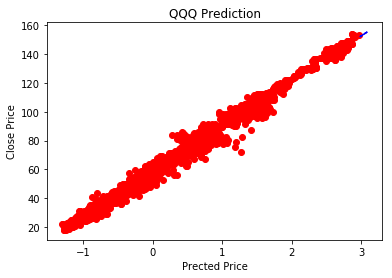

In [287]:
plt.plot(Xpredict, Predict, color = 'blue')
plt.scatter(X_train, Y_train, color = 'red')

plt.title('QQQ Prediction')
plt.xlabel('Prected Price')
plt.ylabel('Close Price')
plt.show()

Use StatsModels to predict QQQ price in linear model

In [266]:
data['Prediction'] = data[['Close']].shift(-sample)
data.dropna(inplace=True)

In [271]:
XX = data['Prediction']
YY = data['Close']

XX = sm.add_constant(XX)

In [272]:
model2 = sm.OLS(YY,XX).fit()
predict = model2.predict(XX)

model_sum = model2.summary()
model_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.101e+05
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:26:26   Log-Likelihood:                -11320.
No. Observations:                4691   AIC:                         2.264e+04
Df Residuals:                    4689   BIC:                         2.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5572      0.084      6.659      0.000       0.393       0.721
Prediction     0.9865      0.001    781.065      0.000       0.984       0.989
==============================================================================
Omnibus:                     1239.004   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12068.847
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      10.611   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create Least Square function to minimize the square error

In [322]:
#Using Numpy
XXX = data['Prediction'].values.reshape(-1,1)
YYY = data['Close'].values.reshape(-1,1)

In [300]:
Xmean = np.mean(XXX)
Ymean = np.mean(YYY)
Xdev = XXX - Xmean
Ydev = YYY - Ymean

In [320]:
LS1 = np.sum(Xdev*Ydev)/np.sum(Xdev**2)
LS0 = Ymean-(LS1*Xmean)


0.9865431235733779